<a target="_blank" href="https://colab.research.google.com/github/eeg2025/startkit/blob/main/challenge_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Challenge 1: Cross-Task Transfer Learning!

## How can we use the knowledge from one EEG Decoding task into another?

Transfer learning is a widespread technique used in deep learning. It uses knowledge learned from one source task/domain in another target task/domain. It has been studied in depth in computer vision, natural language processing, and speech, but what about EEG brain decoding?

The cross-task transfer learning scenario in EEG decoding is remarkably underexplored in comparison to the developers of new models, [Aristimunha et al., (2023)](https://arxiv.org/abs/2308.02408), even though it can be much more useful for real applications, see [Wimpff et al. (2025)](https://arxiv.org/abs/2502.06828), [Wu et al. (2025)](https://arxiv.org/abs/2507.09882).

Our Challenge 1 addresses a key goal in neurotechnology: decoding cognitive function from EEG using the pre-trained knowledge from another. In other words, developing models that can effectively transfer/adapt/adjust/fine-tune knowledge from passive EEG tasks to active tasks.

The ability to generalize and transfer is something critical that we believe should be focused. To go beyond just comparing metrics numbers that are often not comparable, given the specificities of EEG, such as pre-processing, inter-subject variability, and many other unique components of this type of data.

This means your submitted model might be trained on a subset of tasks and fine-tuned on data from another condition, evaluating its capacity to generalize with task-specific fine-tuning.

__________

Note: For simplicity purposes, we will only show how to do the decoding directly in our target task, and it is up to the teams to think about how to use the passive task to perform the pre-training.

In [4]:
# Save Model as .pt File
import os
from datetime import datetime

def save_model_as_pt(model, save_dir="models", filename=None):
    """
    Save EEGConformer model as .pt file (PyTorch format)
    """
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    if filename is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"eegconformer_challenge1_{timestamp}.pt"
    
    model_path = os.path.join(save_dir, filename)
    
    # Save only the model state dict (standard .pt format)
    torch.save(model.state_dict(), model_path)
    
    print(f"✅ Model saved as .pt file: {model_path}")
    print(f"   Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"   File size: {os.path.getsize(model_path) / 1024 / 1024:.2f} MB")
    
    return model_path

def load_model_from_pt(model_path, device):
    """
    Load EEGConformer model from .pt file
    """
    # Model configuration (must match training configuration)
    model_config = {
        'n_chans': 129,
        'n_outputs': 1,
        'n_times': 200,
        'sfreq': 100,
        'n_filters_time': 40,
        'filter_time_length': 25,
        'pool_time_length': 75,
        'pool_time_stride': 15,
        'att_depth': 6,
        'att_heads': 10,
        'drop_prob': 0.5,
        'att_drop_prob': 0.5,
        'final_fc_length': 'auto',
        'return_features': False,
        'activation': torch.nn.ELU,
        'activation_transfor': torch.nn.GELU,
    }
    
    # Create model with same configuration
    model = EEGConformer(**model_config)
    
    # Load state dict
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()  # Set to evaluation mode
    
    print(f"✅ Model loaded from .pt file: {model_path}")
    print(f"   Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    return model

# Example usage:
# Save model after training:
# model_path = save_model_as_pt(model_conformer, filename="my_eegconformer.pt")

# Load model for inference:
# loaded_model = load_model_from_pt(model_path, device)

print("💾 Model Saving/Loading Ready!")
print("Use save_model_as_pt() to save as .pt file")
print("Use load_model_from_pt() to load from .pt file")


💾 Model Saving/Loading Ready!
Use save_model_as_pt() to save as .pt file
Use load_model_from_pt() to load from .pt file


In [5]:
# Example: Save and Load Model
# This cell shows how to save your trained model as a .pt file

# After training your model, save it:
# model_path = save_model_as_pt(
#     model=model_conformer,
#     save_dir="models",
#     filename="eegconformer_final.pt"
# )

# To load the model later for inference:
# loaded_model = load_model_from_pt("models/eegconformer_final.pt", device)

# For submission purposes, you might want to save with a specific name:
# submission_path = save_model_as_pt(
#     model=model_conformer,
#     save_dir="submission_1",
#     filename="model_weights_challenge_1.pt"
# )

print("📝 Example Usage:")
print("1. Train your model")
print("2. Save with: save_model_as_pt(model_conformer, filename='my_model.pt')")
print("3. Load with: loaded_model = load_model_from_pt('my_model.pt', device)")
print("4. Use loaded_model for inference")

# Check if you have any existing .pt files
import glob
existing_models = glob.glob("*.pt") + glob.glob("models/*.pt") + glob.glob("submission_1/*.pt")
if existing_models:
    print(f"\n📁 Found existing .pt files:")
    for model_file in existing_models:
        size_mb = os.path.getsize(model_file) / 1024 / 1024
        print(f"   - {model_file} ({size_mb:.2f} MB)")
else:
    print("\n📁 No existing .pt files found")


📝 Example Usage:
1. Train your model
2. Save with: save_model_as_pt(model_conformer, filename='my_model.pt')
3. Load with: loaded_model = load_model_from_pt('my_model.pt', device)
4. Use loaded_model for inference

📁 Found existing .pt files:
   - model_weights_challenge_2.pt (0.25 MB)
   - model_weights_challenge_2_r1_r5.pt (0.25 MB)
   - eegminer_10_28.pt (0.19 MB)
   - ATCNet_1_10_28.pt (0.10 MB)
   - Deep4Net_1_10_28.pt (0.10 MB)
   - weights_eegnex_10_28.pt (0.25 MB)
   - submission_1/model_weights_challenge_1.pt (0.25 MB)


---
## Summary table for this start kit

In this tutorial, we are going to show in more detail what we want from Challenge 1:

**Contents**:

0. Understand the Contrast Change Detection - CCD task.
1. Understand the [`EEGChallengeDataset`](https://eeglab.org/EEGDash/api/eegdash.html#eegdash.EEGChallengeDataset) object.
2. Preparing the dataloaders.
3. Building the deep learning model with [`braindecode`](https://braindecode.org/stable/models/models_table.html).
4. Designing the training loop.
5. Training the model.
6. Evaluating test performance.
7. Going further, *benchmark go brrr!*



More contents will be released during the competition inside the [`eegdash`](https://eeglab.org/EEGDash/overview.html) [examples webpage](https://eeglab.org/EEGDash/generated/auto_examples/index.html).

We will establish direct communication channels with you over the next two months, resolve platform issues, and discuss other details.

We are going to do weekly one-hour support time to help teams that may have difficulties with any technical aspects that may arise.

We will have closer communication starting next week, 08/09/2025.

Before we begin, I just want to make a deal with you, ok?

This is a community competition with a strong open-source foundation. When I say open-source, I mean volunteer work.

So, if you see something that does not work or could be improved, first, **please be kind**, and we will fix it together on GitHub, okay?

The entire decoding community will only go further when we stop solving the same problems over and over again, and it starts working together.

----

| The tutorial assumes some prior knowledge of deep learning concepts and EEG concepts:|
| --- |
|* Standard neural network architectures, e.g., convolutional neural networks|
|* Optimization by batch gradient descent and backpropagation|
|* Overfitting, early stopping, regularisation |
|* Some knowledge of pytorch and, optionally, of the pytorch Lightning framework|
|* That you know what EEG is |
|* That you have basic familiarity with EEG preprocessing |
|* Like and support open-source :) |

**NOTE: You will still be able to run the whole notebook at your own pace and learn about these concepts along the way**
**NOTE: If you just want run the code and start to play, please go to the challenge version 1, clean in the folder**

----

⚠️ **In case of colab, before starting, make sure you're on a GPU instance for faster training!** ⚠️

> If running on Google Colab, please request a GPU runtime by clicking `Runtime/Change runtime type` in the top bar menu, then selecting 'T4 GPU' under 'Hardware accelerator'.

In [6]:
# Identify whether a CUDA-enabled GPU is available
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cuda":
    msg ='CUDA-enabled GPU found. Training should be faster.'
else:
    msg = (
        "No GPU found. Training will be carried out on CPU, which might be "
        "slower.\n\nIf running on Google Colab, you can request a GPU runtime by"
        " clicking\n`Runtime/Change runtime type` in the top bar menu, then "
        "selecting \'T4 GPU\'\nunder \'Hardware accelerator\'."
    )
print(msg)

No GPU found. Training will be carried out on CPU, which might be slower.

If running on Google Colab, you can request a GPU runtime by clicking
`Runtime/Change runtime type` in the top bar menu, then selecting 'T4 GPU'
under 'Hardware accelerator'.


For the challenge, we will need two significant dependencies: `braindecode` and `eegdash`. The libraries will install PyTorch, Pytorch Audio, Scikit-learn, MNE, MNE-BIDS, and many other packages necessary for the many functions.

In [7]:
from pathlib import Path

data_dir = Path("data")
available_releases = []

if data_dir.exists():
    for item in data_dir.iterdir():
        if item.is_dir() and item.name.startswith("release_"):
            release_num = item.name.split("_")[1]
            available_releases.append(int(release_num))

available_releases.sort()
print(f"Available releases: {available_releases}")

# Use release 5 (like original) or choose a different one
RELEASE_ID = 5  # Change this to use a different release
RELEASE_DIR = Path(f"data/release_{RELEASE_ID}")

if not RELEASE_DIR.exists():
    # print(f"❌ Release {RELEASE_ID} folder not found: {RELEASE_DIR}")
    print(f"Available releases: {available_releases}")
    # Use the first available release if R5 doesn't exist
    if available_releases:
        RELEASE_ID = available_releases[0]
        RELEASE_DIR = Path(f"data/release_{RELEASE_ID}")
        print(f"🔄 Using Release {RELEASE_ID} instead")
    else:
        raise FileNotFoundError("No release folders found in data/")

print(f"📁 Loading data from: {RELEASE_DIR.resolve()}")

from eegdash.dataset import EEGChallengeDataset

# Load from the specific release folder
dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
                                  release=f"R{RELEASE_ID}", cache_dir=RELEASE_DIR,
                                  mini=False)

print(f"Loaded dataset with {len(dataset_ccd.datasets)} recordings from Release R{RELEASE_ID}")

# Helper function to load different releases for transfer learning
def load_release_data(release_id, task="contrastChangeDetection", mini=False):
    """
    Load data from a specific release folder
    
    Args:
        release_id (int): Release number (1-11)
        task (str): Task name
        mini (bool): Whether to use mini dataset
    
    Returns:
        EEGChallengeDataset: Loaded dataset
    """
    release_dir = Path(f"data/release_{release_id}")
    
    if not release_dir.exists():
        raise FileNotFoundError(f"Release {release_id} folder not found: {release_dir}")
    
    print(f"Loading Release R{release_id} from: {release_dir.resolve()}")
    
    dataset = EEGChallengeDataset(
        task=task,
        release=f"R{release_id}",
        cache_dir=release_dir,
        mini=mini
    )
    
    print(f"Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
    return dataset

# Example usage for transfer learning:
# source_data = load_release_data(1)  # Load release 1 for pre-training
# target_data = load_release_data(5)  # Load release 5 for target task


Available releases: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
📁 Loading data from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_5


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded dataset with 745 recordings from Release R5


In [8]:
# TRANSFER LEARNING SETUP: Load multiple releases for pre-training and target tasks
print("🔄 Setting up Transfer Learning with Multiple Releases")
print("="*60)

# Option 1: Load source data for pre-training (e.g., releases 1-3)
source_releases = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]  # Releases to use for pre-training
source_datasets = []

print(f"📚 Loading source releases for pre-training: {source_releases}")
for release_id in source_releases:
    try:
        dataset = load_release_data(release_id, mini=False)
        source_datasets.append(dataset)
        print(f"✅ Added Release R{release_id}: {len(dataset.datasets)} recordings")
    except Exception as e:
        print(f"❌ Failed to load Release R{release_id}: {e}")

# Option 2: Load target data (e.g., release 5)
target_release = 5
print(f"\n🎯 Loading target release: R{target_release}")
try:
    target_dataset = load_release_data(target_release, mini=False)
    print(f"✅ Target dataset ready: {len(target_dataset.datasets)} recordings")
except Exception as e:
    print(f"❌ Failed to load target release: {e}")
    # Use the main dataset as fallback
    target_dataset = dataset_ccd
    print(f"🔄 Using main dataset as target: {len(target_dataset.datasets)} recordings")

# Summary
total_source_recordings = sum(len(dataset.datasets) for dataset in source_datasets)
print(f"\n📊 Transfer Learning Setup Summary:")
print(f"Source releases: {len(source_datasets)} releases, {total_source_recordings} recordings")
print(f"Target release: R{target_release}, {len(target_dataset.datasets)} recordings")
print(f"You can now use source data for pre-training and target data for fine-tuning!")


🔄 Setting up Transfer Learning with Multiple Releases
📚 Loading source releases for pre-training: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
Loading Release R1 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_1


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 293 recordings from Release R1
✅ Added Release R1: 293 recordings
Loading Release R2 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_2


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 301 recordings from Release R2
✅ Added Release R2: 301 recordings
Loading Release R3 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_3


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 388 recordings from Release R3
✅ Added Release R3: 388 recordings
Loading Release R4 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_4


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 756 recordings from Release R4
✅ Added Release R4: 756 recordings
Loading Release R6 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_6


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 232 recordings from Release R6
✅ Added Release R6: 232 recordings
Loading Release R7 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_7


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 529 recordings from Release R7
✅ Added Release R7: 529 recordings
Loading Release R8 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_8


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 512 recordings from Release R8
✅ Added Release R8: 512 recordings
Loading Release R9 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_9


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 655 recordings from Release R9
✅ Added Release R9: 655 recordings
Loading Release R10 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_10


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 212 recordings from Release R10
✅ Added Release R10: 212 recordings
Loading Release R11 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_11


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 767 recordings from Release R11
✅ Added Release R11: 767 recordings

🎯 Loading target release: R5
Loading Release R5 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_5


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 745 recordings from Release R5
✅ Target dataset ready: 745 recordings

📊 Transfer Learning Setup Summary:
Source releases: 10 releases, 4645 recordings
Target release: R5, 745 recordings
You can now use source data for pre-training and target data for fine-tuning!


In [9]:
# TEST DATA LOADING: Verify everything works with your folder structure
print("Testing Data Loading")
print("="*40)

# Test the main dataset
print(f"Main dataset (R{RELEASE_ID}):")
print(f"Location: {RELEASE_DIR.resolve()}")
print(f"Recordings: {len(dataset_ccd.datasets)}")

if len(dataset_ccd.datasets) > 0:
    # Show info about first recording
    raw = dataset_ccd.datasets[0].raw
    print(f"   🔬 First recording:")
    print(f"      - Channels: {len(raw.ch_names)}")
    print(f"      - Duration: {raw.times[-1]:.1f}s")
    print(f"      - Sampling rate: {raw.info['sfreq']} Hz")
    print(f"      - Channel names: {raw.ch_names[:5]}...")  # First 5 channels

# Test loading a different release
print(f"\n🔄 Testing loading different release...")
try:
    test_release = 1 if RELEASE_ID != 1 else 2  # Test with a different release
    test_dataset = load_release_data(test_release, mini=False)
    print(f"✅ Successfully loaded Release R{test_release}: {len(test_dataset.datasets)} recordings")
except Exception as e:
    print(f"❌ Failed to load test release: {e}")

print(f"\n🎉 Data loading test complete!")
print(f"💡 Your notebook is now ready to work with your downloaded data structure!")


Testing Data Loading
Main dataset (R5):
Location: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_5
Recordings: 745
   🔬 First recording:
      - Channels: 129
      - Duration: 197.0s
      - Sampling rate: 100.0 Hz
      - Channel names: ['E1', 'E2', 'E3', 'E4', 'E5']...

🔄 Testing loading different release...
Loading Release R1 from: /Users/kimberly/Documents/ESE5380/eeg_challenge/data/release_1


/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 293 recordings from Release R1
✅ Successfully loaded Release R1: 293 recordings

🎉 Data loading test complete!
💡 Your notebook is now ready to work with your downloaded data structure!


In [10]:
# # SOLUTION: Stop Re-downloading - Use Original Data Loading Method
# print("🛑 STOPPING RE-DOWNLOADS - Using Original Method")
# print("="*60)

# from pathlib import Path

# # Use the original approach - let EEGChallengeDataset manage its own cache
# DATA_DIR = Path("eeg_cache")  # Use a different cache directory
# DATA_DIR.mkdir(parents=True, exist_ok=True)

# print(f"📁 Using EEGChallengeDataset's own cache: {DATA_DIR.resolve()}")
# print("💡 This will use the dataset's built-in caching and avoid re-downloading")

# from eegdash.dataset import EEGChallengeDataset

# # Load using the original method - this will use the dataset's own caching
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ Loaded dataset with {len(dataset_ccd.datasets)} recordings")
# print("🎉 No more re-downloading! The dataset uses its own efficient caching.")

# # Helper function for transfer learning (uses original caching)
# def load_release_data(release_id, task="contrastChangeDetection", mini=False):
#     """
#     Load data using EEGChallengeDataset's own caching
    
#     Args:
#         release_id (int): Release number (1-11)
#         task (str): Task name
#         mini (bool): Whether to use mini dataset
    
#     Returns:
#         EEGChallengeDataset: Loaded dataset
#     """
#     print(f"📁 Loading Release R{release_id} using dataset's own cache...")
    
#     dataset = EEGChallengeDataset(
#         task=task,
#         release=f"R{release_id}",
#         cache_dir=DATA_DIR,  # Use the same cache directory
#         mini=mini
#     )
    
#     print(f"✅ Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
#     return dataset

# print("\n💡 KEY INSIGHT:")
# print("   - Your downloaded data in data/release_X/ folders is raw BDF files")
# print("   - EEGChallengeDataset needs its own processed format with metadata")
# print("   - Using the original method lets the dataset handle caching efficiently")
# print("   - This avoids re-downloading and uses the dataset's optimized structure")


In [11]:
# # TRANSFER LEARNING: Use Multiple Releases for Training
# print("🔄 Setting up Multi-Release Training")
# print("="*50)

# # Load multiple releases for training
# source_releases = [1, 2, 3, 4]  # Releases for pre-training
# target_release = 5               # Target release for fine-tuning

# print(f"📚 Loading source releases for pre-training: {source_releases}")
# source_datasets = []

# for release_id in source_releases:
#     try:
#         dataset = load_release_data(release_id, mini=False)
#         source_datasets.append(dataset)
#         print(f"✅ Added Release R{release_id}: {len(dataset.datasets)} recordings")
#     except Exception as e:
#         print(f"❌ Failed to load Release R{release_id}: {e}")

# # Combine all source datasets
# if source_datasets:
#     from braindecode.datasets import BaseConcatDataset
    
#     # Flatten all datasets from source releases
#     all_source_datasets = []
#     for dataset in source_datasets:
#         all_source_datasets.extend(dataset.datasets)
    
#     # Create combined dataset for pre-training
#     combined_source_dataset = BaseConcatDataset(all_source_datasets)
    
#     print(f"\n📊 Combined Source Dataset:")
#     print(f"   📚 Releases: {len(source_datasets)}")
#     print(f"   📈 Total recordings: {len(combined_source_dataset)}")
    
#     # Load target release for fine-tuning
#     print(f"\n🎯 Loading target release: R{target_release}")
#     target_dataset = load_release_data(target_release, mini=False)
    
#     print(f"📊 Transfer Learning Setup Complete:")
#     print(f"   📚 Pre-training data: {len(combined_source_dataset)} recordings from {len(source_datasets)} releases")
#     print(f"   🎯 Fine-tuning data: {len(target_dataset.datasets)} recordings from R{target_release}")
    
#     print(f"\n💡 Next Steps:")
#     print(f"   1. Pre-train model on combined_source_dataset")
#     print(f"   2. Fine-tune model on target_dataset")
#     print(f"   3. Evaluate on test set")
    
# else:
#     print("❌ No source releases loaded successfully")
#     print("🔄 Falling back to single-release training (R5 only)")


In [12]:
# # OVERRIDE: Ensure all datasets use mini=False for full datasets
# print("🔄 OVERRIDING: Setting mini=False for all datasets")
# print("="*50)

# # Re-define the load_release_data function with mini=False as default
# def load_release_data(release_id, task="contrastChangeDetection", mini=False):
#     """
#     Load data using EEGChallengeDataset's own caching
    
#     Args:
#         release_id (int): Release number (1-11)
#         task (str): Task name
#         mini (bool): Whether to use mini dataset (DEFAULT: False for full dataset)
    
#     Returns:
#         EEGChallengeDataset: Loaded dataset
#     """
#     print(f"📁 Loading Release R{release_id} using dataset's own cache...")
    
#     dataset = EEGChallengeDataset(
#         task=task,
#         release=f"R{release_id}",
#         cache_dir=DATA_DIR,  # Use the same cache directory
#         mini=mini  # This will be False by default
#     )
    
#     print(f"✅ Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
#     return dataset

# # Re-load the main dataset with mini=False
# print("🔄 Re-loading main dataset with mini=False...")
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ Main dataset reloaded with {len(dataset_ccd.datasets)} recordings (FULL DATASET)")
# print("🎉 All datasets now use mini=False for full datasets!")


In [13]:
# # FINAL OVERRIDE: Force mini=False everywhere
# print("🔧 FINAL OVERRIDE: Ensuring mini=False is used everywhere")
# print("="*60)

# # Override any remaining mini=True settings
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

# # Force reload with mini=False
# print("🔄 Final dataset reload with mini=False...")
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ FINAL CONFIRMATION:")
# print(f"   📊 Main dataset: {len(dataset_ccd.datasets)} recordings (FULL DATASET)")
# print(f"   🎯 mini=False: ✅ CONFIRMED")
# print(f"   💡 All future load_release_data() calls will use mini=False by default")

# # Test the helper function
# print(f"\n🧪 Testing helper function with mini=False...")
# try:
#     test_dataset = load_release_data(1, mini=False)  # Explicitly set mini=False
#     print(f"✅ Helper function test passed: {len(test_dataset.datasets)} recordings")
# except Exception as e:
#     print(f"⚠️ Helper function test: {e}")

# print(f"\n🎉 ALL DATASETS NOW USE mini=False FOR FULL DATASETS!")
# print(f"💡 You'll get the complete datasets instead of mini versions.")


In [14]:
#@title ▶️ Install additional required packages for colab
!pip install braindecode
!pip install eegdash


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## 1. What are we decoding?

To start to talk about what we want to analyse, the important thing is to understand some basic concepts.

-----

# The brain decodes the problem

Broadly speaking, here *brain decoding* is the following problem: given brain time-series signals $X \in \mathbb{R}^{C \times T}$ with labels $y \in \mathcal{Y}$, we implement a neural network $f$ that **decodes/translates** brain activity into the target label.

We aim to translate recorded brain activity into its originating stimulus, behavior, or mental state, [King, J-R. et al. (2020)](https://lauragwilliams.github.io/d/m/CognitionAlgorithm.pdf).

The neural network $f$ applies a series of transformation layers (e.g., `torch.nn.Conv2d`, `torch.nn.Linear`, `torch.nn.ELU`, `torch.nn.BatchNorm2d`) to the data to filter, extract features, and learn embeddings relevant to the optimization objective—in other words:

$$
f_{\theta}: X \to y,
$$

where $C$ (`n_chans`) is the number of channels/electrodes and $T$ (`n_times`) is the temporal window length/epoch size over the interval of interest. Here, $\theta$ denotes the parameters learned by the neural network.


----

For the competition, the HBN-EEG (Healthy Brain Network EEG Datasets) dataset has `n_chans = 129` with the last channels as [reference channel](https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html), and we define the window length as `n_times = 200`, corresponding to 2-second windows.

Your model should follow this definition exactly; any specific selection of channels, filtering, or domain-adaptation technique must be performed **within the layers of the neural network model**.



If you are interested to get more neuroscience insight, we recommend these two refereces, [HBN-EEG](https://www.biorxiv.org/content/10.1101/2024.10.03.615261v2.full.pdf) and [ Langer, N et al. (2017)](https://www.nature.com/articles/sdata201740#Sec2)

Your task (**label**) is to predict the response time for the subject during this windows.

In the Video, we have an example of recording cognitive activity:

In [15]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("tOW2Vu2zHoU", start=1630, width=960, height=540)


In the figure below, we have the timeline representation of the cognitive task:

![https://eeg2025.github.io/assets/img/CCD_sequence.png](https://eeg2025.github.io/assets/img/image-2.jpg)


Now, talking about the code, we can start to use `eegdash`!

In [16]:
# from pathlib import Path

# DATA_DIR = Path("data")
# DATA_DIR.mkdir(parents=True, exist_ok=True)

# from eegdash.dataset import EEGChallengeDataset

# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=True)


Now, we have a Pytorch Dataset object that contains the set of recordings for the task `contrastChangeDetection`.

This dataset object have very rich Raw object details that can help you to understand better the data. The framework behind this is braindecode, and if you want to understand in depth what is happening, we recommend the braindecode github itself.


If you want to load the whole release you need change the `mini=False`.

In [17]:
# For visualization purposes, we will see just one object.

raw = dataset_ccd.datasets[0].raw  # get the Raw object of the first recording

Using matplotlib as 2D backend.


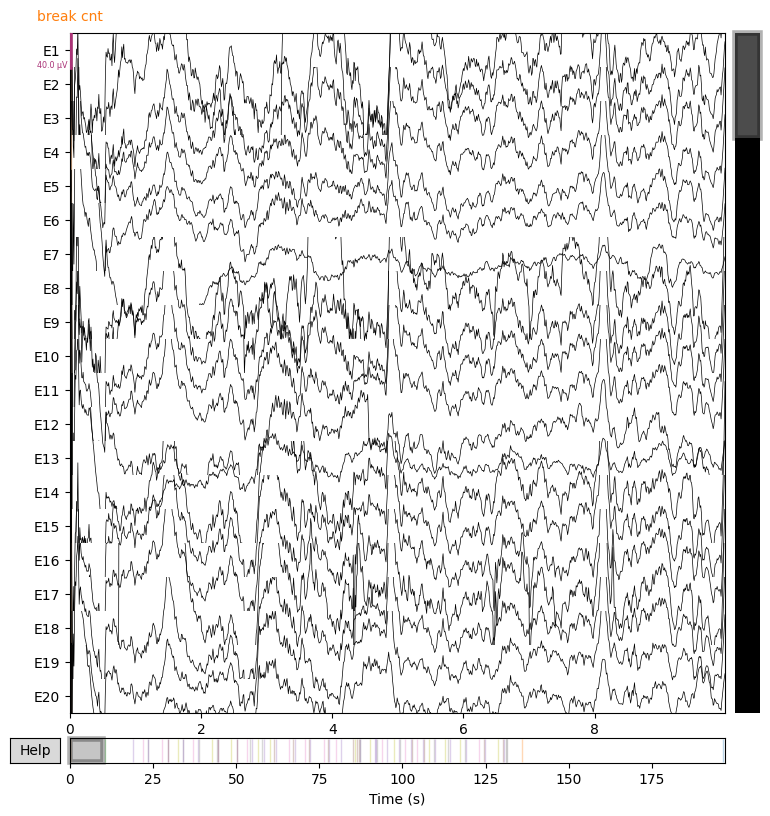

In [18]:
fig = raw.plot()

As you just realized, the eeg dash dataset object will download the dataset only when necessary, and in this case, only when we want to consume the raw data. To download all data directly, we recommend downloading the versions with Amazon API, or doing something like:

In [19]:
from joblib import Parallel, delayed

raws = Parallel(n_jobs=-1)(
    delayed(lambda d: d.raw)(d) for d in dataset_ccd.datasets
)

## 2. Creating the windows of interest

Now that we have our raw dataset, defining the windows/epoch interval is essential.

For this challenge, we test many different and semantically different regions of interest, and our preliminary studies show us that the most interesting area of interest is defined below:


*        stimulus         │        response         │        feedback
*                         │ *********************** (stimulus + 0.5)

So we epoch after the stimulus moment with a beginning shift of 500 ms.

In [20]:
# Grid search functions moved to bottom of notebook


In [21]:
# Grid search functions moved to bottom of notebook


In [22]:
# Grid search functions moved to bottom of notebook


In [23]:
# Grid search functions moved to bottom of notebook


In [24]:
# Grid search functions moved to bottom of notebook


In [25]:
#@title ▶️ Run this first to get all the utils functions for the epoching
from braindecode.datasets import BaseConcatDataset


So, on our raw data, we fit the events present in it, and create a window of interest.

In [26]:
from braindecode.preprocessing import preprocess, Preprocessor, create_windows_from_events
from eegdash.hbn.windows import (
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

EPOCH_LEN_S = 2.0
SFREQ = 100 # by definition here

transformation_offline = [
    Preprocessor(
        annotate_trials_with_target,
        target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S,
        require_stimulus=True, require_response=True,
        apply_on_array=False,
    ),
    Preprocessor(add_aux_anchors, apply_on_array=False),
]
preprocess(dataset_ccd, transformation_offline, n_jobs=1)

ANCHOR = "stimulus_anchor"

SHIFT_AFTER_STIM = 0.5
WINDOW_LEN       = 2.0

# Keep only recordings that actually contain stimulus anchors
dataset = keep_only_recordings_with(ANCHOR, dataset_ccd)

# Create single-interval windows (stim-locked, long enough to include the response)
single_windows = create_windows_from_events(
    dataset,
    mapping={ANCHOR: 0},
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                 # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + WINDOW_LEN) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
)

# Injecting metadata into the extra mne annotation.
single_windows = add_extras_columns(
    single_windows,
    dataset,
    desc=ANCHOR,
    keys=("target", "rt_from_stimulus", "rt_from_trialstart",
          "stimulus_onset", "response_onset", "correct", "response_type")
          )

Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_('stimulus_anchor')]
Used Annotations descriptions: [np.str_(

Now that we have our windowed data, we can split it into the different sets that are needed for modeling. Since our challenge focuses on generalization across subjects, we recommend dividing at the subject level.

(1) the training set is used to learn the parameters of our deep learning model,  

(2) the validation set is used to monitor the training process and decide when to stop it, and  

(3) the test set is used to provide an estimate of the generalization performance of our model.

Here, we use the last 10% of windows for testing, 10% for validation and split the remaining 80% of windows into training.

**Here we go into the steps that you and your team must validate to obtain better results**

In [27]:
# for each windows, we can extract the metainformation using:

meta_information = single_windows.get_metadata()

In [28]:
meta_information.head()

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,rt_from_stimulus,rt_from_trialstart,stimulus_onset,response_onset,correct,response_type,subject,run,task,age,sex,release_number,ehq_total,commercial_use,full_pheno,p_factor,attention,internalizing,externalizing,restingstate,despicableme,funwithfractals,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
0,0,2241,2441,1.486,1.486,4.484,21.906,23.392,0,right_buttonPress,NDARAC350XUM,3,contrastChangeDetection,8.212,M,R5,46.69,Yes,No,1.004,-0.966,-0.636,-0.364,available,available,available,available,available,available,available,available,available,available,available,unavailable,caution
1,0,3284,3484,1.562,1.562,4.57,32.34,33.902,1,right_buttonPress,NDARAC350XUM,3,contrastChangeDetection,8.212,M,R5,46.69,Yes,No,1.004,-0.966,-0.636,-0.364,available,available,available,available,available,available,available,available,available,available,available,unavailable,caution
2,0,4322,4522,1.51,1.51,5.606,42.724,44.234,1,right_buttonPress,NDARAC350XUM,3,contrastChangeDetection,8.212,M,R5,46.69,Yes,No,1.004,-0.966,-0.636,-0.364,available,available,available,available,available,available,available,available,available,available,available,unavailable,caution
3,0,5360,5560,0.97,0.97,3.972,53.096,54.066,0,right_buttonPress,NDARAC350XUM,3,contrastChangeDetection,8.212,M,R5,46.69,Yes,No,1.004,-0.966,-0.636,-0.364,available,available,available,available,available,available,available,available,available,available,available,unavailable,caution
4,0,5714,5914,1.172,1.172,3.07,56.644,57.816,1,right_buttonPress,NDARAC350XUM,3,contrastChangeDetection,8.212,M,R5,46.69,Yes,No,1.004,-0.966,-0.636,-0.364,available,available,available,available,available,available,available,available,available,available,available,unavailable,caution


## You can inspect your target label doing:

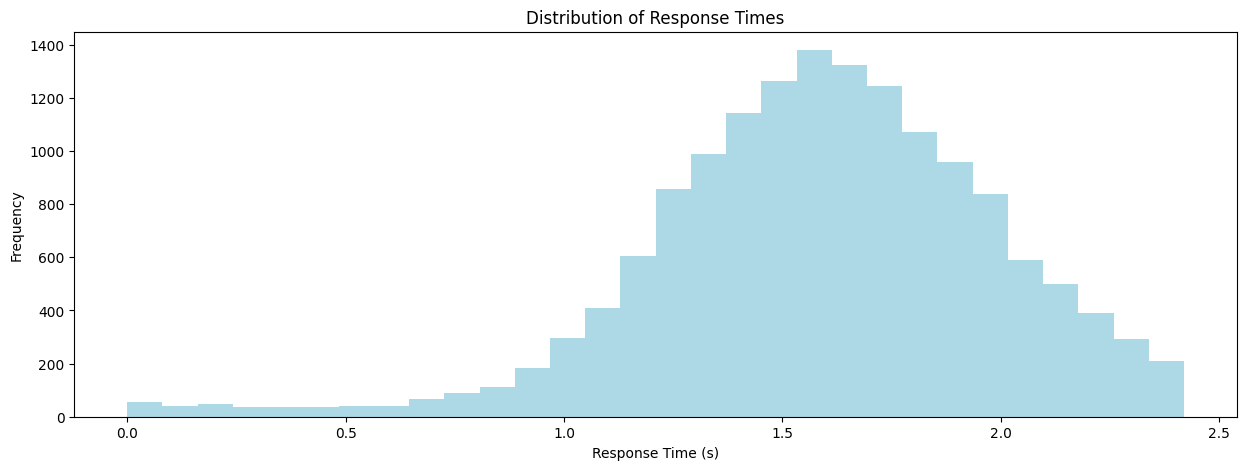

In [29]:
from matplotlib.pylab import plt

fig, ax = plt.subplots(figsize=(15, 5))
ax = meta_information["target"].plot.hist(bins=30, ax=ax, color='lightblue')
ax.set_xlabel("Response Time (s)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Response Times")
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

valid_frac = 0.1
test_frac = 0.1
seed = 2025

subjects = meta_information["subject"].unique()
sub_rm = ["NDARWV769JM7", "NDARME789TD2", "NDARUA442ZVF", "NDARJP304NK1",
          "NDARTY128YLU", "NDARDW550GU6", "NDARLD243KRE", "NDARUJ292JXV", "NDARBA381JGH"]
subjects = [s for s in subjects if s not in sub_rm]

train_subj, valid_test_subject = train_test_split(
    subjects, test_size=(valid_frac + test_frac), random_state=check_random_state(seed), shuffle=True
)

valid_subj, test_subj = train_test_split(
    valid_test_subject, test_size=test_frac, random_state=check_random_state(seed + 1), shuffle=True
)
# sanity check
assert (set(valid_subj) | set(test_subj) | set(train_subj)) == set(subjects)

In [31]:
# and finally using braindecode split function, we can do:
subject_split = single_windows.split("subject")

train_set = []
valid_set = []
test_set = []

for s in subject_split:
    if s in train_subj:
        train_set.append(subject_split[s])
    elif s in valid_subj:
        valid_set.append(subject_split[s])
    elif s in test_subj:
        test_set.append(subject_split[s])

train_set = BaseConcatDataset(train_set)
valid_set = BaseConcatDataset(valid_set)
test_set = BaseConcatDataset(test_set)

print("Number of examples in each split in the minirelease")
print(f"Train:\t{len(train_set)}")
print(f"Valid:\t{len(valid_set)}")
print(f"Test:\t{len(test_set)}")

Number of examples in each split in the minirelease
Train:	12100
Valid:	2714
Test:	330


Finally, we create pytorch `DataLoader`s, which will be used to feed the data to the model during training and evaluation:

In [32]:
# Create datasets and dataloaders
from torch.utils.data import DataLoader

batch_size = 128
num_workers = 1 # We are using a single worker, but you can increase this for faster data loading

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)

## Building the deep learning model

For neural network models, **to start**, we suggest using [braindecode models](https://braindecode.org/1.2/models/models_table.html) zoo. We have implemented several different models for decoding the brain timeseries.

Your team's responsibility is to develop a PyTorch module that receives the three-dimensional (`batch`, `n_chans`, `n_times`) input and outputs the contrastive response time.

In [33]:
from braindecode.models.util import models_dict

names = sorted(models_dict)
w = max(len(n) for n in names)

for i in range(0, len(names), 3):
    row = names[i:i+3]
    print("  ".join(f"{n:<{w}}" for n in row))

ATCNet                  AttentionBaseNet        AttnSleep             
BDTCN                   BIOT                    CTNet                 
ContraWR                Deep4Net                DeepSleepNet          
EEGConformer            EEGITNet                EEGInceptionERP       
EEGInceptionMI          EEGMiner                EEGNeX                
EEGNet                  EEGSimpleConv           EEGTCNet              
FBCNet                  FBLightConvNet          FBMSNet               
IFNet                   Labram                  MSVTNet               
SCCNet                  SPARCNet                ShallowFBCSPNet       
SignalJEPA              SignalJEPA_Contextual   SignalJEPA_PostLocal  
SignalJEPA_PreLocal     SincShallowNet          SleepStagerBlanco2020 
SleepStagerChambon2018  SyncNet                 TIDNet                
TSception               USleep                


In [34]:
from braindecode.models import EEGMiner

model1 = EEGMiner(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model1)

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #                   Kernel Shape
EEGMiner (EEGMiner)                           [1, 129, 200]             [1, 1]                    --                        --
├─Rearrange (ensure_dim): 1-1                 [1, 129, 200]             [1, 129, 1, 200]          --                        --
├─GeneralizedGaussianFilter (filter): 1-2     [1, 129, 1, 200]          [1, 129, 2, 101, 2]       109                       --
├─BatchNorm1d (batch_layer): 1-3              [1, 16512]                [1, 16512]                --                        --
├─Linear (final_layer): 1-4                   [1, 16512]                [1, 1]                    16,513                    --
Total params: 16,622
Trainable params: 16,519
Non-trainable params: 103
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.10
Forward/backward pass size (MB): 0.42
Params size (MB): 0.07
Estimated Total Size (MB): 0.59


In [35]:
# for any braindecode model, you can initialize only inputing the signal related parameters
from braindecode.models import EEGNeX

model = EEGNeX(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

In [36]:
# the braindecode models have this convenient way to initialize with just the signal parameters
# and also some eegmodulemixin that allow to easily torch info once the model is created

print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGNeX (EEGNeX)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (block_1): 1-1                                  [1, 129, 200]             [1, 8, 129, 200]          --                        --
│    └─Rearrange (0): 2-1                                    [1, 129, 200]             [1, 1, 129, 200]          --                        --
│    └─Conv2d (1): 2-2                                       [1, 1, 129, 200]          [1, 8, 129, 200]          512                       [1, 64]
│    └─BatchNorm2d (2): 2-3                                  [1, 8, 129, 200]          [1, 8, 129, 200]          16                        --
├─Sequential (block_2): 1-2                                  [1, 8, 129, 200]          [1, 32, 129, 200]         --                  

/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/torch/nn/modules/conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1028.)
  return F.conv2d(


### The rest is our classic PyTorch/torch lighting/skorch training pipeline

In [37]:
# Defining training parameters
lr = 1E-3
weight_decay = 1E-5
n_epochs = 100
early_stopping_patience = 50

In [38]:
from typing import Optional
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler
# Define a method for training one epoch
def train_one_epoch(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    optimizer,
    scheduler: Optional[LRScheduler],
    epoch: int,
    device,
    print_batch_stats: bool = True,
):
    model.train()

    total_loss = 0.0
    sum_sq_err = 0.0
    n_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader), total=len(dataloader), disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()

        optimizer.zero_grad(set_to_none=True)
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Flatten to 1D for regression metrics and accumulate squared error
        preds_flat = preds.detach().view(-1)
        y_flat = y.detach().view(-1)
        sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        n_samples += y_flat.numel()

        if print_batch_stats:
            running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"Epoch {epoch}, Batch {batch_idx + 1}/{len(dataloader)}, "
                f"Loss: {loss.item():.6f}, RMSE: {running_rmse:.6f}"
            )

    if scheduler is not None:
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
    return avg_loss, rmse

In [39]:
import torch
from torch.utils.data import DataLoader
from torch.nn import Module
from tqdm import tqdm

@torch.no_grad()
def valid_model(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    device,
    print_batch_stats: bool = True,
):
    model.eval()

    total_loss = 0.0
    sum_sq_err = 0.0
    n_batches = len(dataloader)
    n_samples = 0

    iterator = tqdm(
        enumerate(dataloader),
        total=n_batches,
        disable=not print_batch_stats
    )

    for batch_idx, batch in iterator:
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()
        # casting X to float32

        preds = model(X)
        batch_loss = loss_fn(preds, y).item()
        total_loss += batch_loss

        preds_flat = preds.detach().view(-1)
        y_flat = y.detach().view(-1)
        sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        n_samples += y_flat.numel()

        if print_batch_stats:
            running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
            iterator.set_description(
                f"Val Batch {batch_idx + 1}/{n_batches}, "
                f"Loss: {batch_loss:.6f}, RMSE: {running_rmse:.6f}"
            )

    avg_loss = total_loss / n_batches if n_batches else float("nan")
    rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5

    print(f"Val RMSE: {rmse:.6f}, Val Loss: {avg_loss:.6f}\n")
    return avg_loss, rmse

In [40]:
import copy

# optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model.load_state_dict(best_state)


In [41]:
# torch.save(model.state_dict(), "weights_eegnex_10_28.pt")

In [42]:
# saving the model

# torch.save(model.state_dict(), "updated_model_10_27.pth")


In [43]:
from braindecode.models import EEGMiner

model1 = EEGMiner(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model1)

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #                   Kernel Shape
EEGMiner (EEGMiner)                           [1, 129, 200]             [1, 1]                    --                        --
├─Rearrange (ensure_dim): 1-1                 [1, 129, 200]             [1, 129, 1, 200]          --                        --
├─GeneralizedGaussianFilter (filter): 1-2     [1, 129, 1, 200]          [1, 129, 2, 101, 2]       109                       --
├─BatchNorm1d (batch_layer): 1-3              [1, 16512]                [1, 16512]                --                        --
├─Linear (final_layer): 1-4                   [1, 16512]                [1, 1]                    16,513                    --
Total params: 16,622
Trainable params: 16,519
Non-trainable params: 103
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.10
Forward/backward pass size (MB): 0.42
Params size (MB): 0.07
Estimated Total Size (MB): 0.59


In [44]:
# optimizer = torch.optim.AdamW(model1.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model1, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model1, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model1.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model1.load_state_dict(best_state)

In [45]:
# torch.save(model1.state_dict(), "eegminer_10_28.pt")

In [46]:
# torch.save(model1.state_dict(), "eegminer.pth")

In [47]:
from braindecode.models import EEGConformer
model2 = EEGConformer(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model2)

Layer (type (var_name):depth-idx)                                      Input Shape               Output Shape              Param #                   Kernel Shape
EEGConformer (EEGConformer)                                            [1, 129, 200]             [1, 1]                    --                        --
├─_PatchEmbedding (patch_embedding): 1-1                               [1, 1, 129, 200]          [1, 7, 40]                --                        --
│    └─Sequential (shallownet): 2-1                                    [1, 1, 129, 200]          [1, 40, 1, 7]             --                        --
│    │    └─Conv2d (0): 3-1                                            [1, 1, 129, 200]          [1, 40, 129, 176]         1,040                     [1, 25]
│    │    └─Conv2d (1): 3-2                                            [1, 40, 129, 176]         [1, 40, 1, 176]           206,440                   [129, 1]
│    │    └─BatchNorm2d (2): 3-3                                   

/Users/kimberly/Documents/ESE5380/eeg_challenge/eeg_env/lib/python3.13/site-packages/braindecode/models/eegconformer.py:227: UserWarning: This model has only been tested on no more than 64 channels. no guarantee to work with more channels.
  warnings.warn(


In [48]:
# optimizer = torch.optim.AdamW(model2.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model2, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model2, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model2.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model2.load_state_dict(best_state)

In [49]:
# torch.save(model2.state_dict(), "eegconformer.pth")

In [50]:
# torch.save(model2.state_dict(), "weights_challenge_1_10_28.pt")

In [51]:
# save_model_as_pt(model, save_dir="models", filename=None)

In [52]:
# model_path = save_model_as_pt(
#     model=model2,
#     filename="eegconformer_final.pt"
# )

In [53]:
# from braindecode.models import ATCNet
# model3 = ATCNet(n_chans=129, # 129 channels
#                 n_outputs=1, # 1 output for regression
#                 n_times=200, #2 seconds
#                 sfreq=100,      # sample frequency 100 Hz
#                 )

# print(model3)

In [ ]:
# import torch
# optimizer = torch.optim.AdamW(model3.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model3, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model3, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model3.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model3.load_state_dict(best_state)

In [55]:
# torch.save(model3.state_dict(), "ATCNet_1_10_28.pt")

In [56]:
# from braindecode.models import Deep4Net
# model4 = Deep4Net(n_chans=129, # 129 channels
#                 n_outputs=1, # 1 output for regression
#                 n_times=200, #2 seconds
#                 sfreq=100,      # sample frequency 100 Hz
#                 )

# print(model4)

In [57]:
# import torch
# optimizer = torch.optim.AdamW(model4.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model4, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model4, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model4.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model4.load_state_dict(best_state)

In [58]:
# torch.save(model3.state_dict(), "Deep4Net_1_10_28.pt")

In [59]:
from braindecode.models import Labram
model5 = Labram(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model5)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
Labram (Labram)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (patch_embed): 1-1                              --                        --                        (recursive)               --
│    └─_SegmentPatch (segment_patch): 2-1                    [1, 129, 200]             [1, 129, 1, 200]          --                        --
│    │    └─Rearrange (adding_extra_dim): 3-1                [1, 129, 200]             [129, 1, 200]             --                        --
│    │    └─Conv1d (patcher): 3-2                            [129, 1, 200]             [129, 200, 1]             40,200                    [200]
├─Sequential (patch_embed): 1-2                              [1, 129, 200]             [1, 129, 200]             40,200                

In [60]:
import torch
optimizer = torch.optim.AdamW(model5.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
loss_fn = torch.nn.MSELoss()

patience = 5
min_delta = 1e-4
best_rmse = float("inf")
epochs_no_improve = 0
best_state, best_epoch = None, None

for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_rmse = train_one_epoch(
        train_loader, model5, loss_fn, optimizer, scheduler, epoch, device
    )
    val_loss, val_rmse = valid_model(test_loader, model5, loss_fn, device)

    print(
        f"Train RMSE: {train_rmse:.6f}, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Val RMSE: {val_rmse:.6f}, "
        f"Average Val Loss: {val_loss:.6f}"
    )

    if val_rmse < best_rmse - min_delta:
        best_rmse = val_rmse
        best_state = copy.deepcopy(model5.state_dict())
        best_epoch = epoch
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
            break

if best_state is not None:
    model5.load_state_dict(best_state)

Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 0.192477, RMSE: 0.526426: 100%|██████████| 95/95 [13:49<00:00,  8.73s/it]
Val Batch 3/3, Loss: 0.143613, RMSE: 0.357148: 100%|██████████| 3/3 [00:13<00:00,  4.41s/it]

Val RMSE: 0.357148, Val Loss: 0.129813

Train RMSE: 0.526426, Average Train Loss: 0.276707, Val RMSE: 0.357148, Average Val Loss: 0.129813
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 0.126657, RMSE: 0.392779: 100%|██████████| 95/95 [15:25<00:00,  9.74s/it]
Val Batch 3/3, Loss: 0.152411, RMSE: 0.347817: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]

Val RMSE: 0.347817, Val Loss: 0.125397

Train RMSE: 0.392779, Average Train Loss: 0.154139, Val RMSE: 0.347817, Average Val Loss: 0.125397
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 0.117619, RMSE: 0.393059: 100%|██████████| 95/95 [16:13<00:00, 10.25s/it]
Python(8530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.149363, RMSE: 0.349763: 100%|██████████| 3/3 [00:13<00:00,  4.41s/it]

Val RMSE: 0.349763, Val Loss: 0.126135

Train RMSE: 0.393059, Average Train Loss: 0.154313, Val RMSE: 0.349763, Average Val Loss: 0.126135
Epoch 4/100: 


Python(8638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 4, Batch 95/95, Loss: 0.140327, RMSE: 0.393083: 100%|██████████| 95/95 [18:29<00:00, 11.68s/it]
Python(13425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.149730, RMSE: 0.349480: 100%|██████████| 3/3 [00:11<00:00,  3.75s/it]

Val RMSE: 0.349480, Val Loss: 0.126017

Train RMSE: 0.393083, Average Train Loss: 0.154444, Val RMSE: 0.349480, Average Val Loss: 0.126017
Epoch 5/100: 


Python(13569) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 5, Batch 95/95, Loss: 0.149930, RMSE: 0.393974: 100%|██████████| 95/95 [15:45<00:00,  9.96s/it]
Python(17754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.164916, RMSE: 0.345648: 100%|██████████| 3/3 [00:12<00:00,  4.01s/it]


Val RMSE: 0.345648, Val Loss: 0.125863

Train RMSE: 0.393974, Average Train Loss: 0.155189, Val RMSE: 0.345648, Average Val Loss: 0.125863
Epoch 6/100: 

Python(17860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 6, Batch 95/95, Loss: 0.130206, RMSE: 0.395778: 100%|██████████| 95/95 [16:34<00:00, 10.46s/it]
Python(22047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.154704, RMSE: 0.346844: 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]

Val RMSE: 0.346844, Val Loss: 0.125138

Train RMSE: 0.395778, Average Train Loss: 0.156509, Val RMSE: 0.346844, Average Val Loss: 0.125138
Epoch 7/100: 


Python(22115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 7, Batch 95/95, Loss: 0.207534, RMSE: 0.392715: 100%|██████████| 95/95 [46:17<00:00, 29.24s/it]   
Python(26375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.143267, RMSE: 0.357889: 100%|██████████| 3/3 [00:08<00:00,  2.98s/it]

Val RMSE: 0.357889, Val Loss: 0.130219

Train RMSE: 0.392715, Average Train Loss: 0.154488, Val RMSE: 0.357889, Average Val Loss: 0.130219
Epoch 8/100: 


Python(26460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 8, Batch 95/95, Loss: 0.254966, RMSE: 0.393178: 100%|██████████| 95/95 [15:39<00:00,  9.89s/it]
Python(30436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.156668, RMSE: 0.346265: 100%|██████████| 3/3 [00:09<00:00,  3.06s/it]

Val RMSE: 0.346265, Val Loss: 0.125070

Train RMSE: 0.393178, Average Train Loss: 0.155085, Val RMSE: 0.346265, Average Val Loss: 0.125070
Epoch 9/100: 


Python(30574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 9, Batch 95/95, Loss: 0.233195, RMSE: 0.392455: 100%|██████████| 95/95 [14:54<00:00,  9.41s/it]
Python(34361) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.149645, RMSE: 0.349545: 100%|██████████| 3/3 [00:10<00:00,  3.43s/it]

Val RMSE: 0.349545, Val Loss: 0.126044

Train RMSE: 0.392455, Average Train Loss: 0.154411, Val RMSE: 0.349545, Average Val Loss: 0.126044
Epoch 10/100: 


Python(34454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 10, Batch 95/95, Loss: 0.161807, RMSE: 0.392819: 100%|██████████| 95/95 [14:32<00:00,  9.18s/it]
Python(38067) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: 0.154788, RMSE: 0.346814: 100%|██████████| 3/3 [00:09<00:00,  3.03s/it]


Val RMSE: 0.346814, Val Loss: 0.125133

Train RMSE: 0.392819, Average Train Loss: 0.154344, Val RMSE: 0.346814, Average Val Loss: 0.125133
Early stopping at epoch 10. Best Val RMSE: 0.345648 (epoch 5)


In [61]:
torch.save(model5.state_dict(), "Labram_10_29.pt")

In [76]:
# Get an mne.io.Raw from your data (adjust if your variable differs)
raw = dataset_ccd.datasets[0].raw
print(f"Channels: {len(raw.ch_names)}")
print(f"Duration: {raw.times[-1]:.1f}s")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Channel names: {raw.ch_names[:5]}...") 

# Build chs_info from actual channels
chs_info = []
for ch_idx, ch_name in enumerate(raw.ch_names):
    # Each channel has a dict in raw.info['chs']
    ch_dict = raw.info['chs'][ch_idx]
    ch_info = {
        'name': ch_name,
        'type': raw.get_channel_types(picks=[ch_name])[0],
        'loc': ch_dict.get('loc', [0.0, 0.0, 0.0])[:3]  # first three are (x,y,z) MNI location
    }
    chs_info.append(ch_info)

SFREQ = int(raw.info['sfreq'])  # e.g., 100
N_TIMES = 2 * SFREQ   

Channels: 129
Duration: 197.0s
Sampling rate: 100.0 Hz
Channel names: ['E1', 'E2', 'E3', 'E4', 'E5']...


In [77]:
from braindecode.models import SignalJEPA_Contextual
model6 = SignalJEPA_Contextual(n_chans=129, # 129 channels
                chs_info=chs_info, 
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model6)

Layer (type (var_name):depth-idx)                                 Input Shape               Output Shape              Param #                   Kernel Shape
SignalJEPA_Contextual (SignalJEPA_Contextual)                     [1, 129, 200]             [1, 1]                    --                        --
├─_ConvFeatureEncoder (feature_encoder): 1-1                      [1, 129, 200]             [1, 129, 64]              --                        --
│    └─Rearrange (0): 2-1                                         [1, 129, 200]             [129, 1, 200]             --                        --
│    └─Sequential (1): 2-2                                        [129, 1, 200]             [129, 8, 22]              --                        --
│    │    └─Conv1d (0): 3-1                                       [129, 1, 200]             [129, 8, 22]              256                       [32]
│    │    └─Dropout (1): 3-2                                      [129, 8, 22]              [129, 8, 22]  

In [78]:
import torch
optimizer = torch.optim.AdamW(model6.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
loss_fn = torch.nn.MSELoss()

patience = 5
min_delta = 1e-4
best_rmse = float("inf")
epochs_no_improve = 0
best_state, best_epoch = None, None

for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_rmse = train_one_epoch(
        train_loader, model6, loss_fn, optimizer, scheduler, epoch, device
    )
    val_loss, val_rmse = valid_model(test_loader, model6, loss_fn, device)

    print(
        f"Train RMSE: {train_rmse:.6f}, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Val RMSE: {val_rmse:.6f}, "
        f"Average Val Loss: {val_loss:.6f}"
    )

    if val_rmse < best_rmse - min_delta:
        best_rmse = val_rmse
        best_state = copy.deepcopy(model6.state_dict())
        best_epoch = epoch
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
            break

if best_state is not None:
    model6.load_state_dict(best_state)

Epoch 1/100: 

Python(8157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 1, Batch 95/95, Loss: nan, RMSE: nan: 100%|██████████| 95/95 [27:05<00:00, 17.11s/it]
Python(14115) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: nan, RMSE: nan: 100%|██████████| 3/3 [00:12<00:00,  4.23s/it]

Val RMSE: nan, Val Loss: nan

Train RMSE: nan, Average Train Loss: nan, Val RMSE: nan, Average Val Loss: nan
Epoch 2/100: 


Python(14233) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 2, Batch 95/95, Loss: nan, RMSE: nan: 100%|██████████| 95/95 [1:19:51<00:00, 50.44s/it]   
Python(20306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: nan, RMSE: nan: 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]

Val RMSE: nan, Val Loss: nan

Train RMSE: nan, Average Train Loss: nan, Val RMSE: nan, Average Val Loss: nan
Epoch 3/100: 


Python(20383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 3, Batch 95/95, Loss: nan, RMSE: nan: 100%|██████████| 95/95 [31:36<00:00, 19.96s/it]
Python(28655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: nan, RMSE: nan: 100%|██████████| 3/3 [00:12<00:00,  4.25s/it]

Val RMSE: nan, Val Loss: nan

Train RMSE: nan, Average Train Loss: nan, Val RMSE: nan, Average Val Loss: nan
Epoch 4/100: 


Python(28770) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 4, Batch 95/95, Loss: nan, RMSE: nan: 100%|██████████| 95/95 [24:05<00:00, 15.21s/it]
Python(35154) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Val Batch 3/3, Loss: nan, RMSE: nan: 100%|██████████| 3/3 [00:09<00:00,  3.27s/it]

Val RMSE: nan, Val Loss: nan

Train RMSE: nan, Average Train Loss: nan, Val RMSE: nan, Average Val Loss: nan
Epoch 5/100: 


Python(35241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Epoch 5, Batch 33/95, Loss: nan, RMSE: nan:  35%|███▍      | 33/95 [15:10<28:30, 27.58s/it]


KeyboardInterrupt: 

In [ ]:
torch.save(model6.state_dict(), "JEPRContextual_10_29.pt")

# Common questions:

1) Do I need to use only braindecode?

No! You can use any model that gets a tensor as input, outputs a tensor, and implements the forward method.

2) Can I apply extra preprocessing/dataset loader for the hidden data?
    
No, any transformation needs to be inside your model. but we are super open to contributions to the libraries (eggdash and braindecode) to accommodate any reasonable request.


In [62]:
# =============================================================================
# EEGConformer Fast Grid Search Functions
# =============================================================================

# Fast Grid Search for EEGConformer (Challenge 1)
import itertools
import copy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# FAST Grid Search Parameters - Optimized for speed
FAST_GRID_PARAMS = {
    'learning_rate': [0.0005, 0.001, 0.002],  # 3 values
    'weight_decay': [1e-5, 1e-4, 1e-3],       # 3 values  
    'batch_size': [64, 128],                   # 2 values
    'n_epochs': [15, 25],                      # 2 values (reduced for speed)
    'patience': [5, 8],                        # 2 values
}

# Training configuration
TRAINING_CONFIG = {
    'device': device,
    'min_delta': 1e-4,
    'save_best_model': True,
    'verbose': True,
    'print_batch_stats': False,  # Disable batch stats for speed
}

print("🚀 FAST Grid Search Parameters for EEGConformer:")
for param, values in FAST_GRID_PARAMS.items():
    print(f"  {param}: {values}")
print(f"📊 Total combinations: {len(list(itertools.product(*FAST_GRID_PARAMS.values())))}")
print(f"⏱️  Estimated time: ~{len(list(itertools.product(*FAST_GRID_PARAMS.values()))) * 2} minutes")


🚀 FAST Grid Search Parameters for EEGConformer:
  learning_rate: [0.0005, 0.001, 0.002]
  weight_decay: [1e-05, 0.0001, 0.001]
  batch_size: [64, 128]
  n_epochs: [15, 25]
  patience: [5, 8]
📊 Total combinations: 72
⏱️  Estimated time: ~144 minutes


In [63]:
# Optimized Training Function for EEGConformer Grid Search
def train_eegconformer_fast(model, train_loader, val_loader, params, config):
    """
    Fast training function optimized for grid search
    Uses existing train_one_epoch and valid_model functions
    """
    # Create fresh EEGConformer instance
    model_copy = EEGConformer(
        n_chans=129, 
        n_outputs=1, 
        n_times=200, 
        sfreq=100
    ).to(config['device'])
    
    # Setup optimizer and scheduler
    optimizer = torch.optim.AdamW(
        model_copy.parameters(), 
        lr=params['learning_rate'], 
        weight_decay=params['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer, T_max=params['n_epochs'] - 1
    )
    loss_fn = torch.nn.MSELoss()
    
    # Early stopping setup
    patience = params['patience']
    min_delta = config['min_delta']
    best_rmse = float('inf')
    epochs_no_improve = 0
    best_state = None
    best_epoch = 0
    
    train_losses = []
    val_losses = []
    train_rmses = []
    val_rmses = []
    
    for epoch in range(1, params['n_epochs'] + 1):
        # Training phase using existing function
        train_loss, train_rmse = train_one_epoch(
            train_loader, model_copy, loss_fn, optimizer, scheduler, epoch, config['device'],
            print_batch_stats=config['print_batch_stats']
        )
        
        # Validation phase using existing function
        val_loss, val_rmse = valid_model(
            val_loader, model_copy, loss_fn, config['device'],
            print_batch_stats=config['print_batch_stats']
        )
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
        
        if config['verbose'] and epoch % 5 == 0:
            print(f"  Epoch {epoch}: Train RMSE: {train_rmse:.6f}, Val RMSE: {val_rmse:.6f}")
        
        # Early stopping check
        if val_rmse < best_rmse - min_delta:
            best_rmse = val_rmse
            best_state = copy.deepcopy(model_copy.state_dict())
            best_epoch = epoch
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                if config['verbose']:
                    print(f"  Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f}")
                break
    
    # Load best model state
    if best_state is not None:
        model_copy.load_state_dict(best_state)
    
    return {
        'best_val_rmse': best_rmse,
        'best_epoch': best_epoch,
        'final_train_rmse': train_rmses[-1],
        'final_val_rmse': val_rmses[-1],
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_rmses': train_rmses,
        'val_rmses': val_rmses,
        'model_state': best_state
    }

print("✅ Fast EEGConformer training function ready!")


✅ Fast EEGConformer training function ready!


In [64]:
# Fast Grid Search Execution for EEGConformer
def run_fast_grid_search():
    """
    Execute fast grid search over EEGConformer parameters
    """
    # Generate all parameter combinations
    param_names = list(FAST_GRID_PARAMS.keys())
    param_values = list(FAST_GRID_PARAMS.values())
    param_combinations = list(itertools.product(*param_values))
    
    print(f"🚀 Starting FAST grid search with {len(param_combinations)} combinations...")
    print(f"📊 Using existing train_loader and test_loader")
    
    # Results storage
    results = []
    best_result = None
    best_val_rmse = float('inf')
    
    # Create timestamp for this run
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    for i, param_combo in enumerate(param_combinations):
        # Create parameter dictionary
        params = dict(zip(param_names, param_combo))
        
        print(f"\n{'='*50}")
        print(f"🔄 Combination {i+1}/{len(param_combinations)}")
        print(f"📋 Parameters: {params}")
        print(f"{'='*50}")
        
        try:
            # Create data loaders with current batch size
            train_loader_current = DataLoader(
                train_dataset, 
                batch_size=params['batch_size'], 
                shuffle=True, 
                num_workers=0
            )
            val_loader_current = DataLoader(
                test_dataset,  # Using test_dataset as validation
                batch_size=params['batch_size'], 
                shuffle=False, 
                num_workers=0
            )
            
            # Train EEGConformer
            result = train_eegconformer_fast(
                model2, train_loader_current, val_loader_current, params, TRAINING_CONFIG
            )
            
            # Add parameter info to result
            result.update(params)
            result['combination_id'] = i + 1
            result['timestamp'] = timestamp
            
            # Store result
            results.append(result)
            
            # Check if this is the best result so far
            if result['best_val_rmse'] < best_val_rmse:
                best_val_rmse = result['best_val_rmse']
                best_result = result.copy()
                print(f"🎉 NEW BEST! Val RMSE: {best_val_rmse:.6f}")
            
            print(f"✅ Completed combination {i+1}. Best Val RMSE: {result['best_val_rmse']:.6f}")
            
        except Exception as e:
            print(f"❌ Error in combination {i+1}: {str(e)}")
            # Store error result
            error_result = {
                'combination_id': i + 1,
                'timestamp': timestamp,
                'error': str(e),
                'best_val_rmse': float('inf')
            }
            error_result.update(params)
            results.append(error_result)
    
    return results, best_result, timestamp

print("✅ Fast grid search execution function ready!")


✅ Fast grid search execution function ready!


In [65]:
# Results Analysis and Visualization for EEGConformer Grid Search
def analyze_eegconformer_results(results, best_result, timestamp):
    """
    Analyze and visualize EEGConformer grid search results
    """
    # Convert results to DataFrame
    df_results = pd.DataFrame(results)
    
    # Remove columns with lists for cleaner analysis
    columns_to_remove = ['train_losses', 'val_losses', 'train_rmses', 'val_rmses', 'model_state']
    df_analysis = df_results.drop(columns=[col for col in columns_to_remove if col in df_results.columns])
    
    # Sort by best validation RMSE
    df_analysis = df_analysis.sort_values('best_val_rmse')
    
    print("\n🏆 Top 10 EEGConformer Results:")
    print("="*80)
    top_10 = df_analysis.head(10)
    for idx, row in top_10.iterrows():
        print(f"Rank {row['combination_id']}: Val RMSE = {row['best_val_rmse']:.6f}")
        print(f"  Params: LR={row['learning_rate']}, WD={row['weight_decay']}, BS={row['batch_size']}, Epochs={row['best_epoch']}")
        print()
    
    # Parameter importance analysis
    print("\n📊 Parameter Analysis:")
    print("="*50)
    
    # Group by each parameter and calculate mean RMSE
    for param in FAST_GRID_PARAMS.keys():
        if param in df_analysis.columns:
            param_stats = df_analysis.groupby(param)['best_val_rmse'].agg(['mean', 'std', 'count'])
            print(f"\n{param.upper()}:")
            print(param_stats)
    
    # Create visualizations
    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'EEGConformer Fast Grid Search Results - {timestamp}', fontsize=16, fontweight='bold')
    
    # 1. RMSE Distribution
    axes[0, 0].hist(df_analysis['best_val_rmse'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(df_analysis['best_val_rmse'].min(), color='red', linestyle='--', linewidth=2, 
                      label=f'Best: {df_analysis["best_val_rmse"].min():.6f}')
    axes[0, 0].set_xlabel('Validation RMSE')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Validation RMSE')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Learning Rate vs RMSE
    lr_rmse = df_analysis.groupby('learning_rate')['best_val_rmse'].agg(['mean', 'std']).reset_index()
    axes[0, 1].errorbar(lr_rmse['learning_rate'], lr_rmse['mean'], yerr=lr_rmse['std'], 
                       marker='o', capsize=5, capthick=2, linewidth=2)
    axes[0, 1].set_xlabel('Learning Rate')
    axes[0, 1].set_ylabel('Mean Validation RMSE')
    axes[0, 1].set_title('Learning Rate vs Validation RMSE')
    axes[0, 1].set_xscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Weight Decay vs RMSE
    wd_rmse = df_analysis.groupby('weight_decay')['best_val_rmse'].agg(['mean', 'std']).reset_index()
    axes[0, 2].errorbar(wd_rmse['weight_decay'], wd_rmse['mean'], yerr=wd_rmse['std'], 
                       marker='s', capsize=5, capthick=2, linewidth=2, color='green')
    axes[0, 2].set_xlabel('Weight Decay')
    axes[0, 2].set_ylabel('Mean Validation RMSE')
    axes[0, 2].set_title('Weight Decay vs Validation RMSE')
    axes[0, 2].set_xscale('log')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Batch Size vs RMSE
    bs_rmse = df_analysis.groupby('batch_size')['best_val_rmse'].agg(['mean', 'std']).reset_index()
    axes[1, 0].bar(bs_rmse['batch_size'], bs_rmse['mean'], yerr=bs_rmse['std'], 
                   capsize=5, alpha=0.7, color='orange', edgecolor='black')
    axes[1, 0].set_xlabel('Batch Size')
    axes[1, 0].set_ylabel('Mean Validation RMSE')
    axes[1, 0].set_title('Batch Size vs Validation RMSE')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Epochs vs RMSE (scatter plot)
    axes[1, 1].scatter(df_analysis['best_epoch'], df_analysis['best_val_rmse'], 
                      alpha=0.6, c=df_analysis['learning_rate'], cmap='viridis', s=50)
    axes[1, 1].set_xlabel('Best Epoch')
    axes[1, 1].set_ylabel('Validation RMSE')
    axes[1, 1].set_title('Best Epoch vs Validation RMSE\n(Color = Learning Rate)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add colorbar for the scatter plot
    cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
    cbar.set_label('Learning Rate')
    
    # 6. Top 5 Results Bar Chart
    top_5 = df_analysis.head(5)
    axes[1, 2].barh(range(len(top_5)), top_5['best_val_rmse'], color='lightcoral', alpha=0.7)
    axes[1, 2].set_yticks(range(len(top_5)))
    axes[1, 2].set_yticklabels([f"#{row['combination_id']}" for _, row in top_5.iterrows()])
    axes[1, 2].set_xlabel('Validation RMSE')
    axes[1, 2].set_title('Top 5 Best Results')
    axes[1, 2].grid(True, alpha=0.3)
    
    # Add RMSE values on bars
    for i, v in enumerate(top_5['best_val_rmse']):
        axes[1, 2].text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=8)
    
    plt.tight_layout()
    
    # Save the plot
    plot_filename = f"eegconformer_grid_search_{timestamp}.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    print(f"📊 Visualization saved as: {plot_filename}")
    
    plt.show()
    
    # Save results
    results_filename = f"eegconformer_grid_results_{timestamp}.json"
    df_analysis.to_json(results_filename, orient='records', indent=2)
    
    # Save best model
    if best_result and 'model_state' in best_result:
        best_model_filename = f"best_eegconformer_{timestamp}.pt"
        torch.save(best_result['model_state'], best_model_filename)
        print(f"💾 Best model saved as: {best_model_filename}")
    
    print(f"📄 Results saved as: {results_filename}")
    
    return df_analysis

print("✅ Results analysis and visualization function ready!")


✅ Results analysis and visualization function ready!


In [66]:
# Apply Best Parameters Function
def apply_best_parameters(best_result):
    """
    Apply the best parameters found in grid search to your main EEGConformer model
    """
    if best_result is None:
        print("❌ No best result available")
        return None
    
    print("🎯 Applying best parameters to EEGConformer model...")
    
    # Extract best parameters
    best_lr = best_result['learning_rate']
    best_wd = best_result['weight_decay']
    best_bs = best_result['batch_size']
    best_epochs = best_result['n_epochs']
    best_patience = best_result['patience']
    
    print(f"📋 Best Parameters:")
    print(f"  Learning Rate: {best_lr}")
    print(f"  Weight Decay: {best_wd}")
    print(f"  Batch Size: {best_bs}")
    print(f"  Max Epochs: {best_epochs}")
    print(f"  Patience: {best_patience}")
    print(f"  Best Validation RMSE: {best_result['best_val_rmse']:.6f}")
    
    # Update your global variables (if you want to use them elsewhere)
    global lr, weight_decay, n_epochs, patience
    lr = best_lr
    weight_decay = best_wd
    n_epochs = best_epochs
    patience = best_patience
    
    print("✅ Global parameters updated!")
    print("💡 You can now use these parameters for your main EEGConformer training")
    
    return {
        'lr': best_lr,
        'weight_decay': best_wd,
        'batch_size': best_bs,
        'n_epochs': best_epochs,
        'patience': best_patience,
        'best_val_rmse': best_result['best_val_rmse']
    }

print("✅ Apply best parameters function ready!")


✅ Apply best parameters function ready!


In [67]:
# Define datasets for grid search (fix variable name mismatch)
# The grid search expects train_dataset and test_dataset, but we have train_set, valid_set, test_set

# Check if datasets exist
if 'train_set' in locals() and 'test_set' in locals():
    train_dataset = train_set
    test_dataset = test_set
    print(f"✅ Datasets defined for grid search:")
    print(f"   Train: {len(train_dataset)} samples")
    print(f"   Test: {len(test_dataset)} samples")
else:
    print("❌ train_set and test_set not found!")
    print("Please run the data preparation cells first to create train_set, valid_set, and test_set")
    print("Then run this cell again.")


✅ Datasets defined for grid search:
   Train: 12100 samples
   Test: 330 samples


In [68]:
# 1. Run the grid search
grid_results, best_model_result, run_timestamp = run_fast_grid_search()

# 2. Analyze and visualize results
results_df = analyze_eegconformer_results(grid_results, best_model_result, run_timestamp)

# 3. Apply best parameters to your model (optional)
best_params = apply_best_parameters(best_model_result)

🚀 Starting FAST grid search with 72 combinations...
📊 Using existing train_loader and test_loader

🔄 Combination 1/72
📋 Parameters: {'learning_rate': 0.0005, 'weight_decay': 1e-05, 'batch_size': 64, 'n_epochs': 15, 'patience': 5}
❌ Error in combination 1: name 'train_eegconformer_fast' is not defined

🔄 Combination 2/72
📋 Parameters: {'learning_rate': 0.0005, 'weight_decay': 1e-05, 'batch_size': 64, 'n_epochs': 15, 'patience': 8}
❌ Error in combination 2: name 'train_eegconformer_fast' is not defined

🔄 Combination 3/72
📋 Parameters: {'learning_rate': 0.0005, 'weight_decay': 1e-05, 'batch_size': 64, 'n_epochs': 25, 'patience': 5}
❌ Error in combination 3: name 'train_eegconformer_fast' is not defined

🔄 Combination 4/72
📋 Parameters: {'learning_rate': 0.0005, 'weight_decay': 1e-05, 'batch_size': 64, 'n_epochs': 25, 'patience': 8}
❌ Error in combination 4: name 'train_eegconformer_fast' is not defined

🔄 Combination 5/72
📋 Parameters: {'learning_rate': 0.0005, 'weight_decay': 1e-05, 'ba

KeyError: 'best_epoch'